# Sepsis prediction from clinical data

Sepsis is a life-threatening condition that occurs when the body's response to infection causes tissue damage, organ failure, or death ([source](https://doi.org/10.13026/v64v-d857)). Internationally, an estimated 30 million people develop sepsis and 6 million people die from sepsis each year; an estimated 4.2 million newborns and children are affected ([WHO](https://www.who.int/news-room/fact-sheets/detail/sepsis)). Early detection and antibiotic treatment of sepsis are critical for improving sepsis outcomes, where each hour of delayed treatment has been associated with roughly an 4-8% increase in mortality ([source](https://doi.org/10.13026/v64v-d857)).

In this notebook I will do exploratory analysis of clinical data and will try to develop the best model for early prediction of the sepsis among patients.

# Contents
1. [Exploratory Data Analysis](#EDA)
2. [Feature Engineering](#FE)
3. [Model Selection](#MS)
4. [Tunning the model's hyperparameters](#FTSM)

---

**Import libraries:**

In [2]:
# data manipulation libraries
import numpy as np # linear algebra
import pandas as pd # data processing

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning methods
from sklearn.model_selection import train_test_split # data splitting into train and test
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder


from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score

**Load data:**

In [3]:
dataSepsis = pd.read_csv("dataSepsis.csv", sep=";")

----

<a id="EDA"></a>
# 1. Exploratory Data Analysis

First, let's get a cursory overview of the data with Pandas methods `head()`, `info()`, and `describe()`:

In [4]:
dataSepsis.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
HR,103.00,58.00,91.00,92.00,155.50,73.00,NaN,82.00,89.00,100.00,95.00,86.00,88.00,116.00,110.00
O2Sat,90.00,95.00,94.00,100.00,94.50,99.00,NaN,100.00,100.00,95.00,100.00,96.00,100.00,97.00,99.00
Temp,NaN,36.11,38.50,NaN,NaN,36.06,NaN,35.50,NaN,37.28,NaN,38.00,36.30,38.28,36.40
SBP,NaN,143.00,133.00,NaN,147.50,100.00,NaN,112.00,141.00,121.00,89.00,111.00,99.00,200.00,116.00
MAP,NaN,77.00,74.00,NaN,102.00,67.00,NaN,79.50,85.00,20.00,62.33,66.00,66.00,108.00,219.00
DBP,NaN,47.00,48.00,NaN,NaN,49.50,NaN,63.00,57.00,NaN,NaN,49.00,52.00,90.00,66.00
Resp,30.00,11.00,34.00,NaN,33.00,16.50,NaN,14.00,17.00,NaN,18.00,17.00,16.00,24.00,19.00
EtCO2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BaseExcess,21.00,NaN,NaN,NaN,-12.00,-8.00,0.00,0.00,1.00,NaN,NaN,1.00,-3.00,6.00,-8.00
HCO3,45.00,22.00,31.00,29.00,13.00,16.00,25.00,23.00,25.00,22.00,22.00,27.00,20.00,NaN,19.00


Dataset contains data of 36 thousand patients. Each patient is represented by 41 features.

In [5]:
dataSepsis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36302 entries, 0 to 36301
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HR                35506 non-null  float64
 1   O2Sat             34736 non-null  float64
 2   Temp              17101 non-null  float64
 3   SBP               34617 non-null  float64
 4   MAP               34846 non-null  float64
 5   DBP               27917 non-null  float64
 6   Resp              33890 non-null  float64
 7   EtCO2             1613 non-null   float64
 8   BaseExcess        7184 non-null   float64
 9   HCO3              16984 non-null  float64
 10  FiO2              6427 non-null   float64
 11  pH                9221 non-null   float64
 12  PaCO2             8430 non-null   float64
 13  SaO2              4335 non-null   float64
 14  AST               10391 non-null  float64
 15  BUN               32526 non-null  float64
 16  Alkalinephos      10269 non-null  float6

In [6]:
dataSepsis.isna().sum(axis = 0).sort_values(ascending=False) / len(dataSepsis) * 100

Bilirubin_direct    96.881715
EtCO2               95.556719
Fibrinogen          94.102253
TroponinI           89.681009
Lactate             88.612198
SaO2                88.058509
FiO2                82.295741
BaseExcess          80.210457
PaCO2               76.778139
pH                  74.599196
Alkalinephos        71.712302
Bilirubin_total     71.591097
AST                 71.376233
PTT                 61.778965
HCO3                53.214699
Temp                52.892403
Chloride            52.165170
Phosphate           40.036362
Unit2               38.788497
Unit1               38.788497
Magnesium           23.775550
DBP                 23.097901
Calcium             21.153105
WBC                 13.338108
Platelets           13.313316
Hgb                 12.357446
Hct                 11.354746
Creatinine          11.134373
BUN                 10.401631
Potassium            9.897526
Glucose              8.387968
Resp                 6.644262
SBP                  4.641618
O2Sat     

In [7]:
dataSepsis.nunique()

HR                    248
O2Sat                  69
Temp                  292
SBP                   427
MAP                   537
DBP                   253
Resp                  132
EtCO2                  91
BaseExcess            134
HCO3                  118
FiO2                   57
pH                     80
PaCO2                 269
SaO2                  216
AST                   916
BUN                   200
Alkalinephos          547
Calcium               408
Chloride               69
Creatinine           1072
Bilirubin_direct      165
Glucose               751
Lactate               585
Magnesium              69
Phosphate             149
Potassium             243
Bilirubin_total       252
TroponinI             871
Hct                   552
Hgb                   248
PTT                   938
WBC                   576
Fibrinogen            580
Platelets             788
Age                  5835
Gender                  2
Unit1                   2
Unit2                   2
HospAdmTime 

---

### Attributes:
List all the attributes in the dataset. Label continuous attributes with *c* and discrete with *d*

**Vital signs (columns 1-8)** <br>
HR - Heart rate (beats per minute); <br>
O2Sat - Pulse oximetry (%); <br>
Temp - Temperature (Deg C)<br>
SBP - Systolic BP (mm Hg)<br>
MAP - Mean arterial pressure (mm Hg)<br>
DBP - Diastolic BP (mm Hg)<br>
Resp - Respiration rate (breaths per minute)<br>
EtCO2 - End tidal carbon dioxide (mm Hg)<br><br>
**Laboratory values (columns 9-34)**<br>
BaseExcess - Measure of excess bicarbonate (mmol/L)<br>
HCO3 - Bicarbonate (mmol/L)<br>
FiO2 - Fraction of inspired oxygen (%)<br>
pH - N/A<br>
PaCO2 - Partial pressure of carbon dioxide from arterial blood (mm Hg)<br>
SaO2 - Oxygen saturation from arterial blood (%)<br>
AST - Aspartate transaminase (IU/L)<br>
BUN - Blood urea nitrogen (mg/dL)<br>
Alkalinephos - Alkaline phosphatase (IU/L)<br>
Calcium - (mg/dL)<br>
Chloride - (mmol/L)<br>
Creatinine - (mg/dL)<br>
Bilirubin_direct - Bilirubin direct (mg/dL)<br>
Glucose - Serum glucose (mg/dL)<br>
Lactate - Lactic acid (mg/dL)<br>
Magnesium - (mmol/dL)<br>
Phosphate - (mg/dL)<br>
Potassium - (mmol/L)<br>
Bilirubin_total - Total bilirubin (mg/dL)<br>
TroponinI - Troponin I (ng/mL)<br>
Hct - Hematocrit (%)<br>
Hgb - Hemoglobin (g/dL)<br>
PTT - partial thromboplastin time (seconds)<br>
WBC - Leukocyte count (count*10^3/µL)<br>
Fibrinogen - (mg/dL)<br>
Platelets - (count*10^3/µL)<br><br>
**Demographics (columns 35-40)**<br>
Age - Years (100 for patients 90 or above)<br>
Gender - Female (0) or Male (1)<br>
Unit1 - Administrative identifier for ICU unit (MICU)<br>
Unit2 - Administrative identifier for ICU unit (SICU)<br>
HospAdmTime - Hours between hospital admit and ICU admit<br>
ICULOS - ICU length-of-stay (hours since ICU admit)<br><br>
**Outcome (column 41)** <br>
SepsisLabel - For sepsis patients, `SepsisLabel` is $1$ if $t≥t_{sepsis}-6$ and $0$ if $t<t_{sepsis}−6$. <br>
For non-sepsis patients, `SepsisLabel` is $0$.

---

In [8]:
dataSepsis.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
HR,35506.0,83.547246,17.486670,26.00,71.00,82.000,94.0000,184.00
O2Sat,34736.0,97.444337,2.827282,27.00,96.00,98.000,100.0000,100.00
Temp,17101.0,36.824187,0.855630,26.67,36.30,36.800,37.3900,41.80
SBP,34617.0,122.625064,23.092558,32.00,106.00,120.000,137.0000,281.00
MAP,34846.0,82.263649,16.876642,20.00,71.00,80.000,91.3300,291.00
DBP,27917.0,63.793506,14.130816,22.00,54.00,62.000,72.0000,281.00
Resp,33890.0,18.041841,5.020912,1.00,15.00,18.000,20.5000,59.00
EtCO2,1613.0,32.402046,7.947214,10.00,28.00,33.000,37.5000,97.00
BaseExcess,7184.0,-0.306508,4.151943,-29.00,-2.00,0.000,2.0000,36.00
HCO3,16984.0,24.255841,4.150083,5.00,22.00,24.000,26.0000,55.00


Compute share of missing values for each feature (%):

In [9]:
dataSepsis["isSepsis"].value_counts()

0    33655
1     2647
Name: isSepsis, dtype: int64

### Early summary:
+ Most of the features are continuous with only **gender**, **Unit1**, **Unit2**, and target **isSepsis** represented by discrete values. In total 39 continuous features, 2 categorical.
+ A lot of features miss more than half of values, with **Bilirubin_direct** missing as much as 97%. We may expect that these rare values were measured because some kind of abnormality was expected hence non-missing values may be non-representative of the total population.
+ A lot of negative values in **HospAdmTime** which probably means that the patient was first delivered to ICU and some time later released from ICU to a hospital. Positive values mean that the patient has gotten to ICU after spending some time in a hospital. This is just an assumption, however, an should be checked.
+ **Unit1** and **Unit2** stand for ICU units. Based on them we can find out, whether that person has had to be put in MICU (medical intensive care unit) or SICU (surgical intensive care unit).
+ Septic patients constitute only 7% of the total dataset we have to take this into account when selecting a model

In [40]:
udS=dataSepsis.drop(['BaseExcess','HCO3','FiO2','pH','PaCO2','SaO2','AST','BUN','Alkalinephos','Calcium','Chloride','Creatinine','Bilirubin_direct','Glucose','Lactate','Magnesium','Phosphate','Potassium','Bilirubin_total','TroponinI','Hct','Hgb','PTT','WBC','Fibrinogen','Platelets','Age','Gender','Unit1','Unit2','HospAdmTime','ICULOS'],axis=1)

In [41]:
udS.head(15).T

,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17
HR,91.0,92.0,155.5,73.00,NaN,89.0,100.00,95.00,86.0,88.0,116.00,110.0,54.0,98.0,72.0
O2Sat,94.0,100.0,94.5,99.00,NaN,100.0,95.00,100.00,96.0,100.0,97.00,99.0,95.0,94.0,96.0
Temp,38.5,NaN,NaN,36.06,NaN,NaN,37.28,NaN,38.0,36.3,38.28,36.4,NaN,NaN,NaN
SBP,133.0,NaN,147.5,100.00,NaN,141.0,121.00,89.00,111.0,99.0,200.00,116.0,103.0,95.0,103.0
MAP,74.0,NaN,102.0,67.00,NaN,85.0,20.00,62.33,66.0,66.0,108.00,219.0,63.0,62.0,62.0
DBP,48.0,NaN,NaN,49.50,NaN,57.0,NaN,NaN,49.0,52.0,90.00,66.0,NaN,45.0,45.0
Resp,34.0,NaN,33.0,16.50,NaN,17.0,NaN,18.00,17.0,16.0,24.00,19.0,11.0,15.0,20.0
EtCO2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isSepsis,0.0,0.0,0.0,0.00,1.0,1.0,0.00,0.00,0.0,0.0,1.00,0.0,0.0,0.0,1.0


---

Now we should split the data into train and test data and put test data aside until we have a trained model.

In [44]:
X_train, X_test, y_train, y_test = train_test_split(udS.drop("isSepsis", axis=1), udS["isSepsis"], test_size=0.1, random_state=42)

---

## Visualise the data

In [11]:
# set plots style
sns.set_theme(context="notebook", style="whitegrid", palette="tab10")

AttributeError: module 'seaborn' has no attribute 'set_theme'

### Visualise **vital signs**:

AttributeError: module 'seaborn' has no attribute 'histplot'

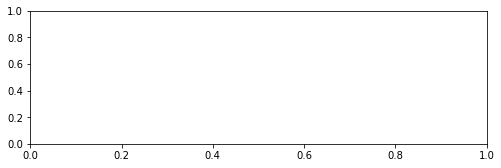

In [45]:
#X_train.columns

vital_signs = ["HR", "O2Sat", "Temp", "SBP", "MAP", "DBP", "Resp", "EtCO2"]

plt.figure(figsize=(18,12))
plt.subplots_adjust(hspace = .3)
for i, column in enumerate(vital_signs, 1):
    plt.subplot(4,2,i)
    sns.histplot(data=X_train, x=column, hue=y_train, stat="density", common_norm=False, bins=60, kde=True)
    
#plt.savefig("vital_signs.png", dpi=400)

### Visualize **laboratory values**:

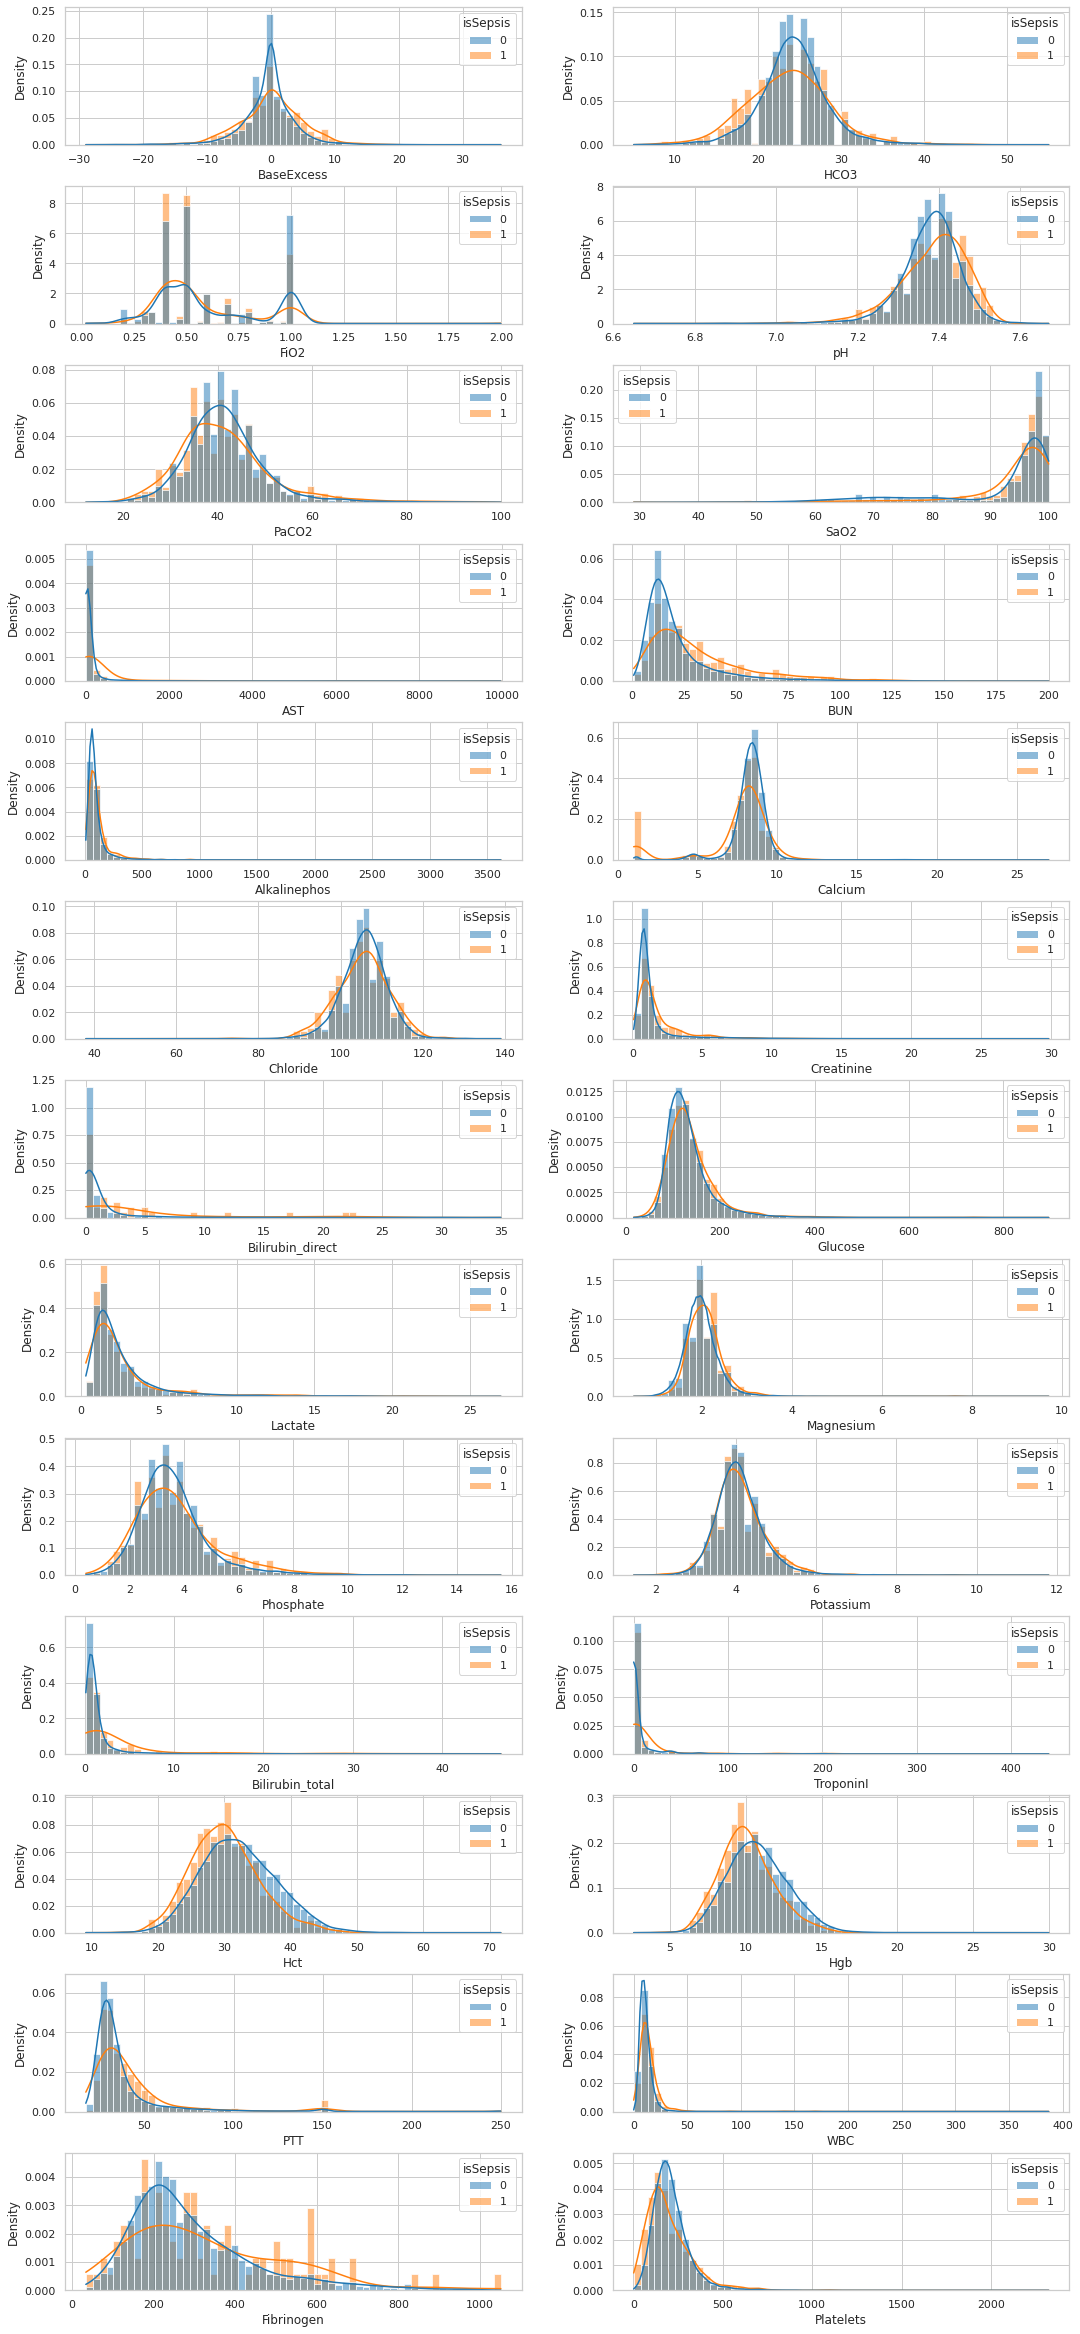

In [ ]:
#X_train.columns

lab_values = ['BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets']

plt.figure(figsize=(18,42))
plt.subplots_adjust(hspace = .3)
for i, column in enumerate(lab_values, 1):
    plt.subplot(13,2,i)
    sns.histplot(data=X_train, x=column, hue=y_train, stat="density", bins=60, common_norm=False, kde=True)
    
#plt.savefig("lab_values.png", dpi=400)

### Visualise **demographics:**

AttributeError: module 'seaborn' has no attribute 'histplot'

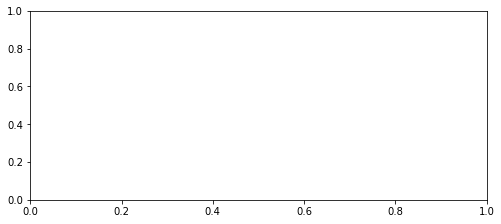

In [43]:
#X_train.columns

demographics = ["Age", "HospAdmTime", "ICULOS"]

plt.figure(figsize=(18,8))
plt.subplots_adjust(hspace = .3)
for i, column in enumerate(demographics, 1):
    plt.subplot(2,2,i)
    sns.histplot(data=X_train, x=column, hue=y_train, stat="density", bins=60, common_norm=False, kde=True)
    
#plt.savefig("demographics.png", dpi=400)

In [46]:
def plotGender(data):
    gender = data
    gender[gender==0] = "female"
    gender[gender==1] = "male"
    
    sns.countplot(x=gender, hue=y_train, dodge=False)    

    
def plotUnit(data):
    Unit1 = data["Unit1"][data["Unit1"]==1].count() # patients in Unit1
    Unit2 = data["Unit2"][data["Unit2"]==1].count() # patients in Unit2
    totalNa = len(data["Unit1"][(data["Unit1"].isna()) & (data["Unit2"].isna())])
    
    sns.barplot(x=["Medical ICU","Surgical ICU","Not Given"] ,y=[Unit1, Unit2, totalNa])

KeyError: 'Gender'

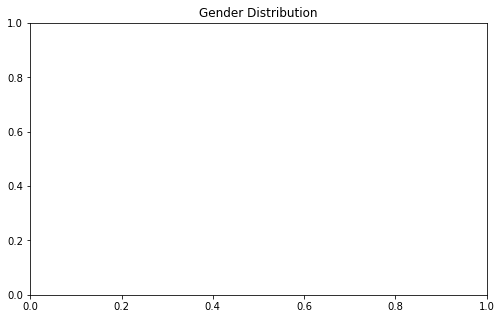

In [47]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.title("Gender Distribution")
plotGender(X_train["Gender"])   
plt.subplot(1,2,2)
plt.title("ICU distribution")
plotUnit(X_train)

#plt.savefig("additional.png", dpi=400)

### Observations
**Vital signs:**
+ **HR**, **Temp**, and **Resp** seem to differ between septic and non-septic patients
+ The rest of the attributes don't differ and may be irrelevant in terms of sepsis prediction <br>

**Laboratory values:**
+ Despite having similar mean, feature **BaseExcess** appears to deviate higher from the mean for septic patients, it is possible that abnormal concentration of excess bicarbonate is inherent to septic patients
+ **FiO2** is represented by somewhat discrete values with bimodal distribution. This and the fact that just about 20% of the patients have record of this value makes this features likely to be diregarded as non-representative
+ **pH** of septic patients appears to be higher (more basic pH)
+ **BUN** also appears to be higher in concentrations for sepsis-positive patients
+ **Calcium** concentration, although similar for septic and non-septic patients, has outliers for septic patients at very low concentrations. We may want to investigate this further
+ **Bilirubin_direct** looks to be higher for septic patients, but we have to keep in mind that more than 96% of the patients lack this attribute. Nontheless, it is possible though that bilirubin concentration was measured only if doctors suspected this attribute to be abnormal and we there are indeed some very high concentration for septic patients
+ **Bilirubin_total** is higher for septic patients as well. Worth noting, that total bilirubin concentration is defined as the sum of **Bilirubin_direct** and indirect bilirubin. Therefore we may expect this feature to be strongly correlated with **Bilirubin_direct** 
+ **Hct** and **Hgb** values seem to be slightly lower in concentrations for septic patients
+ Septic patients appear to have slightly higher **PTT** sometime
+ **Fibrinogen** of septic patient appears to be bimodal and slightly higher in concentration than that of non-septic patients. About 95% of patients miss this feature thus we might expect that fibrinogen was measured for some specific reason
+ Septic patients may have slightly lower concantrations of **Platelets**

**Demographics:**
+ No differnce in **Age** between septic and non-septic patients. It is unlikely that one or few years of diffence in age may lead to higher chance of developing sepsis. However, in many biochmical signs tend to change with age, therefore it may be benefitial to include age in our model but to divide it into some discrete, more representative values. A lot of age values are 100, which are for patients older than 90.
+ **HospAdmTime** is quite similar for all patients
+ Patients that stayed at ICU longer have had higher chances of eventually developing sepsis
+ Patients that didn't have a record of ICU unit were likely assigned to other ICU than SICU and MICU (e.g. Cardiac ICU, Trauma ICU etc.) as all the patients have a record of time spent in ICU (**ICULOS** attributte).

---

Let's see if the type of **ICU** that a patient is treated in is related to chances of developing a sepsis:

In [48]:
def CombineUnits(units_cols):
    data = units_cols.copy()
    data["Unit"] = pd.Series(np.zeros((len(data))))
    data.loc[data["Unit1"] == 1, "Unit"] = "MICU"
    data.loc[data["Unit2"] == 1, "Unit"] = "SICU"
    data.loc[(data["Unit1"].isna()) & (data["Unit2"].isna()), "Unit"] = "Other ICU"
    return data[["Unit"]]


def ShareSepticByUnit(UnitCol, y):
    shares = {}
    
    IsSepsis_micu = y.loc[UnitCol["Unit"] == "MICU"]
    IsSepsis_sicu = y.loc[UnitCol["Unit"] == "SICU"]
    IsSepsis_other = y.loc[UnitCol["Unit"] == "Other ICU"]
    
    shares["MICU"] = IsSepsis_micu[IsSepsis_micu == 1].count() / len(IsSepsis_micu) * 100
    shares["SICU"] = IsSepsis_sicu[IsSepsis_sicu == 1].count() / len(IsSepsis_sicu) * 100
    shares["Other"] = IsSepsis_other[IsSepsis_other == 1].count() / len(IsSepsis_other) * 100
        
    return shares


IsSeptic_shares = ShareSepticByUnit(CombineUnits(X_train.copy()), y_train)

KeyError: 'Unit1'

<AxesSubplot:ylabel='Developed Sepsis (%)'>

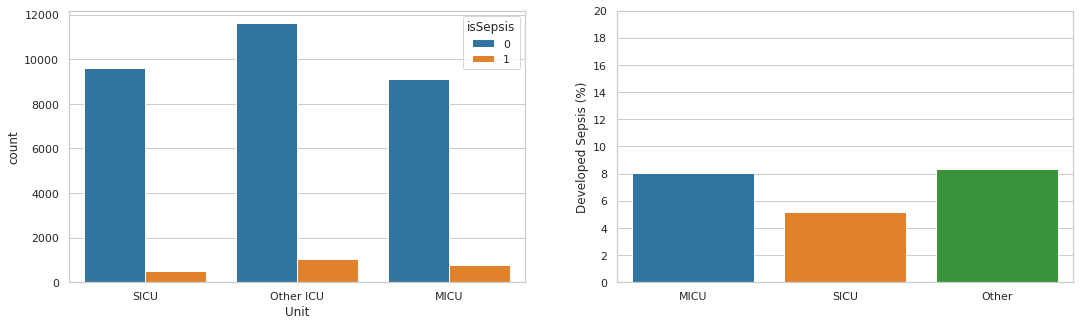

In [ ]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.countplot(data=CombineUnits(X_train.copy()), x="Unit", hue=y_train)
plt.subplot(1,2,2)
plt.ylim([0,20])
plt.ylabel("Developed Sepsis (%)")
plt.yticks([i for i in range(0,21,2)])
sns.barplot(x=list(IsSeptic_shares.keys()), y=list(IsSeptic_shares.values()))

#plt.savefig("add2.png", dpi=400)

Not by much, but patients treated in surgical ICU had lower probability of developing sepsis. This feature may be useful for our model.

---

### Preliminary feature exclusion <br>
Before we move any further with our analysis let's discuss if we want to disregard any features as irrelevant or non-representative (or both). 
+ **FiO2** (fraction of inspired oxygen) is missing for 82 % of the patients from the test set. The distribution of this feature also looks very unusual, perhaps indicating that this sample is quite non-representative. 
+ **EtCO2** (end tidal carbon dioxide) lacks for more than 95 % of the patients. This feature does not change between septic and non-septic patients and although there might be a specific reasong to measure this parameter is appear to be non-related to sepsis occurence. 
+ **SaO2** is similar case to **EtCO2** - lots of missing values and no apparent difference between septic and non-septic patients, we will drop this feature. 
+ **HospAdmTime** (hours between hospital admit and ICU admit) does not differ between positive and negative patients. Overall, most of the patients are delivered to ICU as soon as they develop a critical condition and it's probably irrelevant how long they have been present in a hospital in stable condition.
+ **TroponinI** is missing in most cases (>95%) and is reported to indicate heart and kidney failure, thus we may exclude thus feature



In [49]:
udS.head(15).T

,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17
HR,91.0,92.0,155.5,73.00,NaN,89.0,100.00,95.00,86.0,88.0,116.00,110.0,54.0,98.0,72.0
O2Sat,94.0,100.0,94.5,99.00,NaN,100.0,95.00,100.00,96.0,100.0,97.00,99.0,95.0,94.0,96.0
Temp,38.5,NaN,NaN,36.06,NaN,NaN,37.28,NaN,38.0,36.3,38.28,36.4,NaN,NaN,NaN
SBP,133.0,NaN,147.5,100.00,NaN,141.0,121.00,89.00,111.0,99.0,200.00,116.0,103.0,95.0,103.0
MAP,74.0,NaN,102.0,67.00,NaN,85.0,20.00,62.33,66.0,66.0,108.00,219.0,63.0,62.0,62.0
DBP,48.0,NaN,NaN,49.50,NaN,57.0,NaN,NaN,49.0,52.0,90.00,66.0,NaN,45.0,45.0
Resp,34.0,NaN,33.0,16.50,NaN,17.0,NaN,18.00,17.0,16.0,24.00,19.0,11.0,15.0,20.0
EtCO2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isSepsis,0.0,0.0,0.0,0.00,1.0,1.0,0.00,0.00,0.0,0.0,1.00,0.0,0.0,0.0,1.0


Now that we excluded some features let's take a look if any numerical features correlate to each other:

In [50]:
#X_train.columns
correlation_features = ["HR", "O2Sat", "Temp", "SBP", "MAP", "DBP", "Resp", "BaseExcess", "HCO3", "pH", "PaCO2", "AST",
                       "BUN", "Alkalinephos", "Calcium", "Chloride", "Creatinine", "Bilirubin_direct", "Glucose", "Lactate",
                       "Magnesium", "Phosphate", "Potassium", "Bilirubin_total", "Hct", "Hgb", "PTT", "WBC",
                       "Fibrinogen", "Platelets", "Age"]

mat_corr = X_train[correlation_features].corr()

mask = np.zeros_like(mat_corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(26,22))
sns.heatmap(mat_corr, mask=mask, square=True, annot=True, fmt=".2f", center=0, linewidths=.5, cmap="RdBu")

#plt.savefig("cormat.png", dpi=400)

KeyError: "['Calcium', 'Potassium', 'AST', 'Creatinine', 'Bilirubin_total', 'BaseExcess', 'Chloride', 'Lactate', 'Fibrinogen', 'Age', 'pH', 'HCO3', 'BUN', 'Hgb', 'Magnesium', 'WBC', 'Glucose', 'PTT', 'Bilirubin_direct', 'Hct', 'Platelets', 'Phosphate', 'Alkalinephos', 'PaCO2'] not in index"

In [51]:
mat_corr["Bilirubin_total"].sort_values(ascending=False)[:3]

NameError: name 'mat_corr' is not defined

In [ ]:
mat_corr["DBP"].sort_values(ascending=False)[:3]

DBP    1.000000
MAP    0.852862
SBP    0.570960
Name: DBP, dtype: float64

In [ ]:
mat_corr["SBP"].sort_values(ascending=False)[:3]

SBP    1.000000
MAP    0.779998
DBP    0.570960
Name: SBP, dtype: float64

In [ ]:
mat_corr["HCO3"].sort_values(ascending=False)[:4]

HCO3          1.000000
BaseExcess    0.840452
PaCO2         0.584750
pH            0.326729
Name: HCO3, dtype: float64

In [ ]:
mat_corr["pH"].sort_values(ascending=False)[:4]

pH            1.000000
BaseExcess    0.662243
HCO3          0.326729
Temp          0.215224
Name: pH, dtype: float64

In [ ]:
mat_corr["PaCO2"].sort_values(ascending=False)[:4]

PaCO2         1.000000
HCO3          0.584750
BaseExcess    0.332045
Phosphate     0.119146
Name: PaCO2, dtype: float64

In [ ]:
mat_corr["Hgb"].sort_values(ascending=False)[:3]

Hgb    1.000000
Hct    0.950894
DBP    0.252229
Name: Hgb, dtype: float64

+ Unsurprisingly a high correclation between **Bilirubin_direct** and **Bilirubin_total**. **Bilirubin_direct** is missing for about 96 % of patients, having another feature that highly correlates to this one enables us to exclude **Bilirubin_direct** from classification model. 
+ There is a high correlation between **DBP** (diastolic BP), **MAP** (mean arterial pressure), and **SBP** (systolic BP). Mean arterial pressure is known ([source](https://doi.org/10.1007/s00134-009-1427-2)) to be primary indicator of patient state in near septic conditions, thus, both **DBP** and **SBP** may be disregarded as **MAP** is calculated from these two features. 
+ We can notice correlation between three features - **pH**, **HCO<sub>3</sub>**, and **PaCO<sub>2</sub>**. Despite being correlated the ratio between these three features may tell us whether the patient is undergoing *acidosis* or *alkalosis* and which one it is *metabolic* or *respiratory*. Thus, it's better to leave these features and maybe combine them into some categorical feature that will state what type of acidosis/alkalosis has been developed. 
+ Lastly, hemoglobin (**Hgb**) and hematocrit (**Hct**) values happened to be highly correlated. This is to no surprise because whilst hemoglobin expresses concentration of hemoglobin in blood, hematocrit is a volume share of erytrocytes in blood. Research articles about sepsis diagnosis mostly concentrate on hemoglobin out of these two, while hematocrit is often used to asses anemia and other diseases. Let's stick with experts and leave just **Hgb**.

---

Now, let's perform a chi square test. This test will show us what features are independant with the target label.

In [52]:
from sklearn.feature_selection import chi2
from sklearn.impute import SimpleImputer

X_train.columns
chi_cols = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2', 
       'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'ICULOS']

X_chi = X_train[chi_cols].copy()

imputer = SimpleImputer(strategy="median")
X_chi[chi_cols] = imputer.fit_transform(X_chi)

chis = chi2(X_chi, y_train)

len(chi_cols)
chis[0].reshape(len(chi_cols),1)

chi_dict = {}
p_dict = {}
for i in range(len(chi_cols)):
    chi_dict[chi_cols[i]] = chis[0][i]
    p_dict[chi_cols[i]] = chis[1][i]

KeyError: "['Calcium', 'Potassium', 'AST', 'Creatinine', 'Bilirubin_total', 'TroponinI', 'Chloride', 'Lactate', 'Fibrinogen', 'Age', 'pH', 'HCO3', 'BUN', 'Hgb', 'Magnesium', 'SaO2', 'WBC', 'Glucose', 'PTT', 'Bilirubin_direct', 'Hct', 'Platelets', 'Phosphate', 'FiO2', 'Alkalinephos', 'PaCO2', 'ICULOS'] not in index"

In [53]:
p_dict

NameError: name 'p_dict' is not defined

P-values represent probability of a null-hypothesis applicability to a given feature. In this case the null-hypothesis is that a feature and target label are dependant values. For feature selection we will use the most common p-value threshold - 95 %. Thus, all features with p-value higher than 0.05 violate null-hypothesis and may be disregarded. These features are: <br>
**EtCO2**<br>
**FiO2**<br>
**SaO2**<br>
**Chloride**<br>
**Bilirubin_direct**<br>
**Lactate**<br>
**Magnesium**<br>
**Phosphate**<br>
**Potassium**<br>
Other than that we can see that **pH** and **PaCO2** violate null-hypothesis. We mentioned that these features may predict acid-base disturbances in patients. However, since we have **BaseExcess** feature **pH** becomes rudimentary, however we can still use **PaCO2** to find out wheter a patient has metabolic or respiratory disturbance. Specifically, septic patients often develop a condition known as *Respiratory alkalosis with metabolic acidosis*.

---

Let's examine some outliers. We know that patients above 90 y.o are marked as 100 y.o. This may be misleading; we may expect a difference in metabolic and immune processes between 90 y.o. and say 110 y.o. Therefore we will exclude patients older than 90 later in [feature engineering.](#FE) Other outliers were observed in **Calcium** and **PTT** features, let's check them:

In [54]:
X_train[X_train["Calcium"] < 2].head().T

KeyError: 'Calcium'

In [55]:
X_train["Calcium"][X_train["Calcium"] < 2].count()

KeyError: 'Calcium'

In [71]:
X_train[X_train["PTT"] > 150].head().T

KeyError: 'PTT'

In [ ]:
X_train["Calcium"][X_train["PTT"] > 150].count()

38

Cursory examining don't lead to any substantial finding. The only observation worth noting is rather low temperatures recorded from patients with high **PTT**. We will not remove these observations for now.

---

<a id="FE"></a>
# 2. Feature Engineering

Now it's time to engineer our features. First, let's make a list of features that are left after **EDA**. Expand the list below if you want to see the features, there are still quite a lot of them.

**Vital signs (columns 1-8)** <br>
HR - Heart rate (beats per minute); <br>
O2Sat - Pulse oximetry (%); <br>
Temp - Temperature (Deg C)<br>
MAP - Mean arterial pressure (mm Hg)<br>
Resp - Respiration rate (breaths per minute)<br>
**Laboratory values (columns 9-34)**<br>
BaseExcess - Measure of excess bicarbonate (mmol/L)<br>
HCO3 - Bicarbonate (mmol/L)<br>
pH - N/A<br>
PaCO2 - Partial pressure of carbon dioxide from arterial blood (mm Hg)<br>
SaO2 - Oxygen saturation from arterial blood (%)<br>
AST - Aspartate transaminase (IU/L)<br>
BUN - Blood urea nitrogen (mg/dL)<br>
Alkalinephos - Alkaline phosphatase (IU/L)<br>
Calcium - (mg/dL)<br>
Chloride - (mmol/L)<br>
Creatinine - (mg/dL)<br>
Glucose - Serum glucose (mg/dL)<br>
Lactate - Lactic acid (mg/dL)<br>
Magnesium - (mmol/dL)<br>
Phosphate - (mg/dL)<br>
Potassium - (mmol/L)<br>
Bilirubin_total - Total bilirubin (mg/dL)<br>
Hgb - Hemoglobin (g/dL)<br>
PTT - partial thromboplastin time (seconds)<br>
WBC - Leukocyte count (count*10^3/µL)<br>
Fibrinogen - (mg/dL)<br>
Platelets - (count*10^3/µL)<br><br>
**Demographics (columns 35-40)**<br>
Age - Years (100 for patients 90 or above)<br>
Gender - Female (0) or Male (1)<br>
Unit - Administrative identifier for ICU unit<br>
ICULOS - ICU length-of-stay (hours since ICU admit)<br><br>

---

### Age

Let's begin with the most obvious - **Age**. It's unlikely that a difference in one or few years will result in significantly different metabolic processes, immune responses and overall fitness. Nonetheless, we may expect a teen and a senior to have different metabolism. Thus, let's divide age into categories:

In [56]:
# remove outliers
y_train = y_train.loc[X_train["Age"] <= 90]
X_train = X_train.loc[X_train["Age"] <= 90]

y_test = y_test.loc[X_test["Age"] <= 90]
X_test = X_test.loc[X_test["Age"] <= 90]

KeyError: 'Age'

In [ ]:
def discretizateAge(data):
    # teen, youth, adult, senior
    bins = [13, 18, 30, 60, np.inf]
    data = np.digitize(data, bins=bins)
    data = data.reshape(len(data), 1)
    return data

DiscretizateAge = FunctionTransformer(discretizateAge)
DiscretizateAge.fit_transform(X_train["Age"]).shape

(32360, 1)

In [ ]:
age_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("discretizator", DiscretizateAge)
])

age_pipeline.fit_transform(X_train[["Age"]]).shape

(32360, 1)

In [ ]:
CombineAllUnits = FunctionTransformer(CombineUnits)

units = ["Unit1", "Unit2"]

units_pipeline = Pipeline([
    ("combine", CombineAllUnits),
    ("encoder", OneHotEncoder(sparse=False))
])

units_pipeline.fit_transform(X_train[units]).shape

(32360, 3)

In [ ]:
acidbase_features = ["BaseExcess", "PaCO2"]

def isAcidBaseDisturb(cols):
    cols = np.c_[cols, np.zeros(len(cols))]
    cols[:,2][(cols[:,0] < -2) & (cols[:,1] < 40)] = 1
    col = cols[:,2].reshape(len(cols), 1)
    return col

FindAcidosis = FunctionTransformer(isAcidBaseDisturb)
FindAcidosis.fit_transform(X_train[acidbase_features])

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [ ]:
acidbase_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("acidosis", FindAcidosis)
])

acidbase_pipeline.fit_transform(X_train[acidbase_features]).shape

(32360, 1)

In [70]:
num_features = ["HR", "O2Sat", "Temp", "MAP", "Resp", "AST", "BUN",
                "Alkalinephos", "Calcium", "Creatinine", "Glucose", "Bilirubin_total", 
                "Hgb", "PTT", "WBC", "Fibrinogen", "Platelets", "ICULOS"]

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

num_pipeline.fit_transform(X_train[num_features]).shape

KeyError: "['Creatinine', 'BUN', 'Bilirubin_total', 'Hgb', 'Calcium', 'Alkalinephos', 'WBC', 'Glucose', 'PTT', 'AST', 'Fibrinogen', 'ICULOS', 'Platelets'] not in index"

In [ ]:
gender_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder())
])

gender_pipeline.fit_transform(X_train[["Gender"]])

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

In [58]:
preprocessing_pipeline = ColumnTransformer([
    ("numbers", num_pipeline, num_features),
    ("acidbase", acidbase_pipeline, acidbase_features),
    ("age", age_pipeline, ["Age"]),
    ("units", units_pipeline, units),
    ("gender", gender_pipeline, ["Gender"])
], verbose=True)

preprocessing_pipeline.fit_transform(X_train).shape

NameError: name 'num_pipeline' is not defined

---

<a id="MS"></a>
# 3. Model Selection

Before we train our model we have to select an appropriate metric. If we recall that just 7% of all patients in our dataset had sepsis we should give a higher value to false negatives (penalizing our model for predicting all 0s), thus a good metric would be *f1 score* :), which is defined as:<br>

$$ f_{1} = 2 \cdot \frac{recall \cdot precision}{recall + precision} $$

In [57]:
X_train = preprocessing_pipeline.fit_transform(X_train)

X_test = preprocessing_pipeline.fit_transform(X_test)

NameError: name 'preprocessing_pipeline' is not defined

In [ ]:
logreg = LogisticRegression(verbose=1)
logreg.fit(X_train, y_train)
cv_logreg = cross_validate(logreg, X_train, y_train, cv=3, scoring="f1", return_train_score=True)
cv_logreg

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


{'fit_time': array([0.28175497, 0.26120138, 0.27458763]),
 'score_time': array([0.01054072, 0.01087904, 0.00991917]),
 'test_score': array([0.48979592, 0.51141553, 0.50819672]),
 'train_score': array([0.50434783, 0.50890818, 0.50664224])}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
cv_knn = cross_validate(knn, X_train, y_train, cv=3, scoring="f1", return_train_score=True)
cv_knn

{'fit_time': array([0.00494337, 0.0044136 , 0.00433421]),
 'score_time': array([5.68921375, 5.07034993, 5.4776516 ]),
 'test_score': array([0.48628193, 0.48725212, 0.46878002]),
 'train_score': array([0.47659981, 0.48193916, 0.49362907])}

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, verbose=1)
cv_rf = cross_validate(rf, X_train, y_train, cv=3, scoring="f1", return_train_score=True)
cv_rf

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

{'fit_time': array([0.36084008, 0.35085106, 0.33956528]),
 'score_time': array([0.02391124, 0.02306557, 0.02347994]),
 'test_score': array([0.74315322, 0.75334324, 0.72067901]),
 'train_score': array([0.96194226, 0.96797386, 0.96247531])}

In [59]:
from xgboost import XGBClassifier

xgboost = XGBClassifier(n_estimators=150, use_label_encoder=False, scale_pos_weight=12, eval_metric="aucpr", verbosity=1, disable_default_eval_metric=1)
cv_xgboost = cross_validate(xgboost, X_train, y_train, cv=3, scoring="f1", return_train_score=True, verbose=1)
cv_xgboost

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.5s finished


{'fit_time': array([2.73651576, 2.09099817, 2.17000341]),
 'score_time': array([0.06299782, 0.06499767, 0.0639987 ]),
 'test_score': array([0.24932542, 0.2429078 , 0.24      ]),
 'train_score': array([0.28555829, 0.30001494, 0.29109776])}

In [60]:
nn = MLPClassifier(max_iter=5000, hidden_layer_sizes=(50,50,50,50), verbose=0, learning_rate="adaptive")
cv_nn = cross_validate(nn, X_train, y_train, cv=3, scoring="f1", return_train_score=True, verbose=1)
cv_nn

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Miniconda3\envs\dash_env\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
C:\ProgramData\Miniconda3\envs\dash_env\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
C:\ProgramData\Miniconda3\envs\dash_env\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: I

{'fit_time': array([0.00399518, 0.00800943, 0.00700593]),
 'score_time': array([0., 0., 0.]),
 'test_score': array([nan, nan, nan]),
 'train_score': array([nan, nan, nan])}

It's evident that a simple logistic regression unit and k-means clustering underfit the data, while both ensemble models and neural network overfit.

<a id="FTSM"></a>
# 4. Tunning model's hyperparameters

In [61]:
params = {"n_estimators": [150, 200],"max_delta_step": [0.1], "subsample": [None, 0.5, 1], "reg_lambda": [1, 1.1], "alpha": [0, 0.1]}

In [62]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=xgboost, param_grid=params, verbose=2, scoring="f1", cv=2)
grid_search = grid_search.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Miniconda3\envs\dash_env\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: Invalid Parameter format for subsample expect float but value='None'

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV] alpha=0, max_delta_step=0.1, n_estimators=150, reg_lambda=1, subsample=None 
[CV]  alpha=0, max_delta_step=0.1, n_estimators=150, reg_lambda=1, subsample=None, total=   0.0s
[CV] alpha=0, max_delta_step=0.1, n_estimators=150, reg_lambda=1, subsample=None 
[CV]  alpha=0, max_delta_step=0.1, n_estimators=150, reg_lambda=1, subsample=None, total=   0.0s
[CV] alpha=0, max_delta_step=0.1, n_estimators=150, reg_lambda=1, subsample=0.5 
[CV]  alpha=0, max_delta_step=0.1, n_estimators=150, reg_lambda=1, subsample=0.5, total=   2.4s
[CV] alpha=0, max_delta_step=0.1, n_estimators=150, reg_lambda=1, subsample=0.5 
[CV]  alpha=0, max_delta_step=0.1, n_estimators=150, reg_lambda=1, subsample=0.5, total=   2.4s
[CV] alpha=0, max_delta_step=0.1, n_estimators=150, reg_lambda=1, subsample=1 
[CV]  alpha=0, max_delta_step=0.1, n_estimators=150, reg_lambda=1, subsample=1, total=   1.8s
[CV] alpha=0, max_delta_step=0.1, n_estimators=150, re

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  1.4min finished


In [63]:
grid_search.best_score_

0.24015418133065192

In [64]:
grid_search.best_params_

{'alpha': 0,
 'max_delta_step': 0.1,
 'n_estimators': 200,
 'reg_lambda': 1.1,
 'subsample': 1}

In [65]:
from sklearn.metrics import plot_confusion_matrix

xgboost = XGBClassifier(**grid_search.best_params_, use_label_encoder=False, scale_pos_weight=12, eval_metric="aucpr", verbosity=1, disable_default_eval_metric=1)
xgboost.fit(X_train, y_train)

XGBClassifier(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              disable_default_eval_metric=1, eval_metric='aucpr', gamma=0,
              learning_rate=0.1, max_delta_step=0.1, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1.1, scale_pos_weight=12, seed=None,
              silent=None, subsample=1, use_label_encoder=False, verbosity=1)

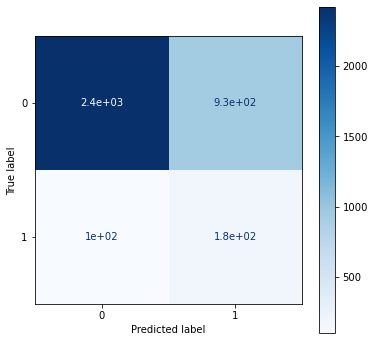

In [66]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(xgboost, X_test, y_test, cmap="Blues", ax=ax)
plt.savefig("conf.png", dpi=400)

In [67]:
y_pred = xgboost.predict(X_test)

In [68]:
from sklearn.metrics import recall_score


print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.6382978723404256
0.25917926565874727


In [69]:
import pickle
pickle.dump(xgboost, open("xgboost.pkl","wb"))
